ENTREGABLE NOTEBOOKS.

**ESTUDIO: Los factores que afectaron en mayor y menor medida a la probabilidad de supervivencia de los pasajeros en el hundimiento del titanic.**

*A continuación, se va a hacer un pequeño estudio para analizar si pese que es mundialmente conocido que en el hundimiento del titanic se dio prioridad a la supervivencia de mujeres y niños, este hecho fue del todo cierto o existen otros factores que también tuvieron especial relevancia en dicha supervivencia.*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic = pd.read_csv("/content/drive/MyDrive/Titanic/train.csv")
print(titanic)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Vamos a partir de un extracto de aproximadamente 900 pasajeros del titanic con toda la información disponible sobre cada individuo junto a si sobrevivió o no, a partir del cual realizaremos el estudio.

En primer lugar vamos a analizar el dicho común sobre mujeres y niños, por lo que agrupamos por edad y comparamos el grupo menor de 18 años con el grupo mayor.

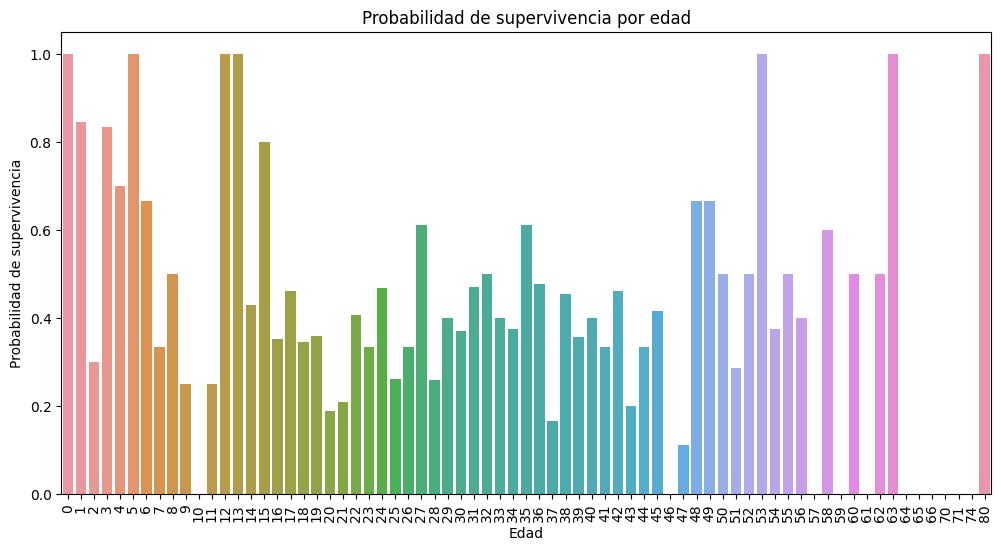

In [ ]:
plt.figure(figsize=(12, 6))

# Redondear y convertir las edades a enteros
titanic['Age_Rounded'] = titanic['Age'].round().astype('Int64')  #'Int64' para manejar nulos

# Eliminar filas con valores nulos en 'Age_Rounded'
titanic_cleaned = titanic.dropna(subset=['Age_Rounded'])

# Crear un gráfico de barras agrupadas por edad
sns.barplot(x='Age_Rounded', y='Survived', data=titanic_cleaned, errorbar=None)

plt.title('Probabilidad de supervivencia por edad')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de supervivencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x
plt.show()

In [ ]:
# Crear una nueva columna 'grupo_edad'
titanic['grupo_edad'] = pd.cut(titanic['Age'], bins=[0, 18, titanic['Age'].max()], labels=['Menor de 18', 'Mayor de 18'])

# Calcular la probabilidad de supervivencia por grupo de edad
probabilidad_supervivencia_por_edad = titanic.groupby('grupo_edad')['Survived'].mean()

# Mostrar el resultado
probabilidad_supervivencia_por_edad

grupo_edad
Menor de 18    0.503597
Mayor de 18    0.382609
Name: Survived, dtype: float64

A priori por grupo de edad podemos ver que esta afirmación es cierta. La mitad de los pasajeros menores de 18 años sobrevivieron, mientras que solo un 38% de los mayores lo hicieron.

Dentro del grupo mayor de edad parece algo elevado el porcentaje de supervivencia, pero a través de la gráfica vemos que a partir de de los 55 años la probabilidad aumenta respecto al grupo comprendido entre los 18 y los 55 años, por lo que nos puede dar a entender que se tuvo consideración con las personas mayores y también se les dio prioridad.

A continución vamos a estudiar el factor de género entre hombres y mujeres.

In [ ]:
pivot_table = pd.pivot_table(titanic, index='Survived', columns='Sex', aggfunc='size', fill_value=0)

print(pivot_table)

Sex       female  male
Survived              
0             81   468
1            233   109


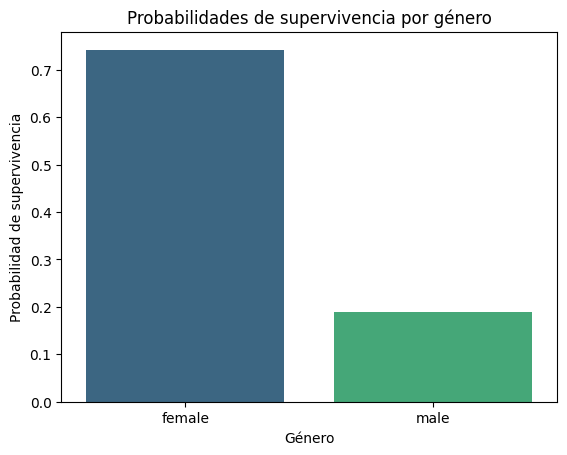

In [ ]:
probabilities = titanic.groupby('Sex')['Survived'].mean().reset_index()

# Crear la gráfica
sns.barplot(x='Sex', y='Survived', data=probabilities, palette='viridis')
plt.title('Probabilidades de supervivencia por género')
plt.xlabel('Género')
plt.ylabel('Probabilidad de supervivencia')
plt.show()

Los datos de género vemos que si que son muy determinantes, más del 70% de las mujeres sobrevivió, mientras que solo entorno al 20% de los hombres lo hizo.

Ahora vamos a analizar un dato que debería ser relevante, que es la clase. Se entiende que se le debió dar prioridad a pasajeros de primera clase antes que de tercera.

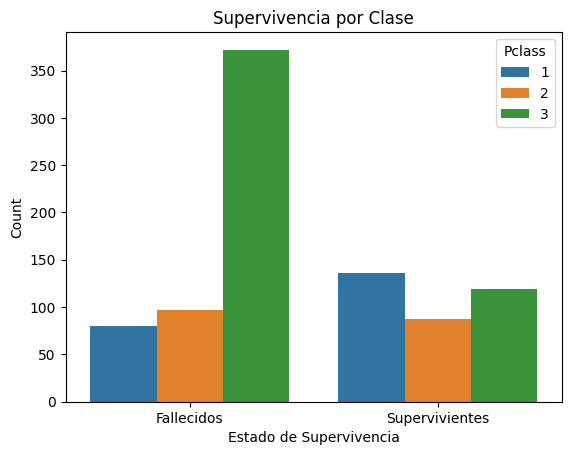

In [ ]:
titanic['Survival Status'] = titanic['Survived'].map({0: 'Fallecidos', 1: 'Supervivientes'})

# Crear el gráfico de barras
sns.countplot(x='Survival Status', hue='Pclass', data=titanic)
plt.title('Supervivencia por Clase')
plt.xlabel('Estado de Supervivencia')
plt.ylabel('Count')
plt.show()

Viendo la gráfica, no parece un factor determinante, ya que pese a que hay más supervivientes de primera clase, la diferencia es mínima, en cambio el número de fallecimientos de tercera clase es elevado por ser mucho mayor número de pasajeros, por lo que no podemos afirmar que sea un factor relevante, ya que vemos que se priorizó antes a las mujeres y a los niños que a la propia clase.

Ahora vamos a estudiar si disponer de hermanos a bordo pudo tener que ver a la hora de priorizar evacuaciones.

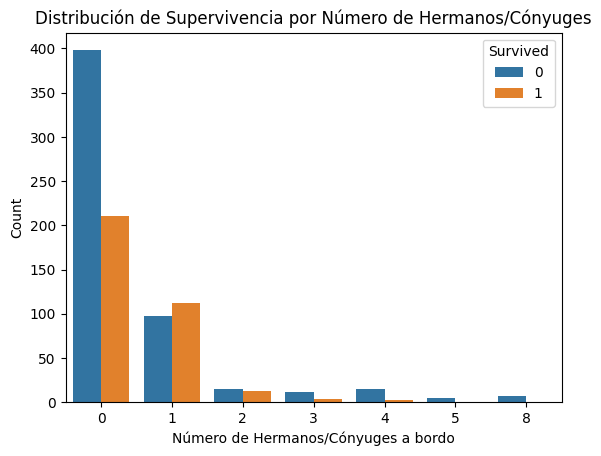

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='SibSp', hue='Survived', data=titanic)
plt.title('Distribución de Supervivencia por Número de Hermanos/Cónyuges')
plt.xlabel('Número de Hermanos/Cónyuges a bordo')
plt.ylabel('Count')
plt.show()

Vemos que este factor es muy determinante, sin hermanos/cónyuges hubo mucha más cantidad de fallecidos. Los que disponían de un familiar sobrevieron prácticamente el 50%, lo que nos da a entender que también se priorizaron los grupos de familiares.

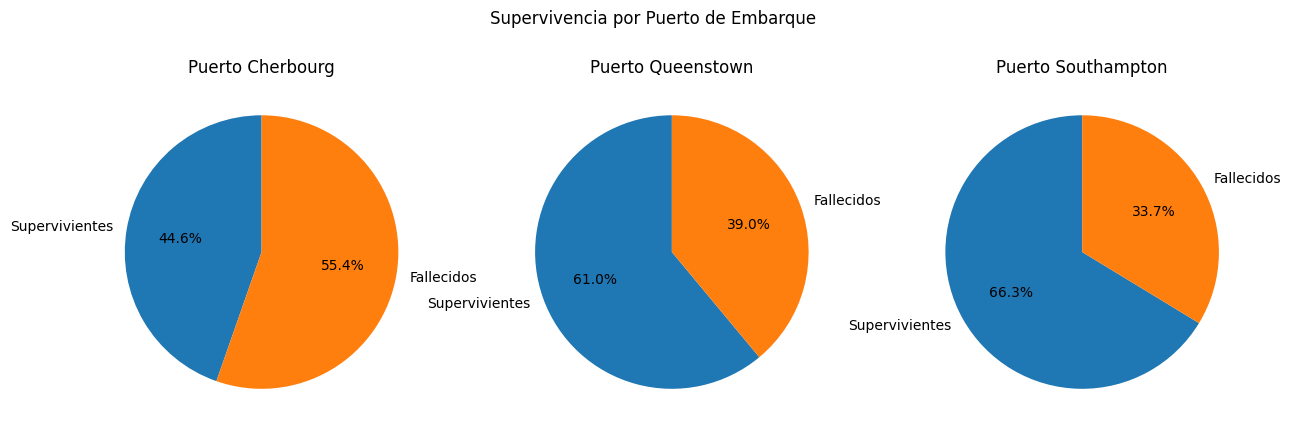

In [ ]:
titanic['Embarked'] = titanic['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# Crear la tabla de frecuencia
surv_by_embarked = titanic.groupby('Embarked')['Survived'].value_counts().unstack()

# Crear el gráfico de torta con etiquetas personalizadas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, embarked in enumerate(surv_by_embarked.index):
    labels = ['Supervivientes', 'Fallecidos']
    axes[i].pie(surv_by_embarked.loc[embarked], labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Puerto {embarked}')

plt.suptitle('Supervivencia por Puerto de Embarque')
plt.show()

Analizando la supervivencia por puerto de embarque sorprende que la tasa de supervivencia caiga tanto entre los que salieron desde Cherbourg respecto al resto, por lo que vamos a indagar si alguno de los factores más determinantes que hemos estudiado anteriormente puede tener algo que ver o existe algún otro factor condicionante.

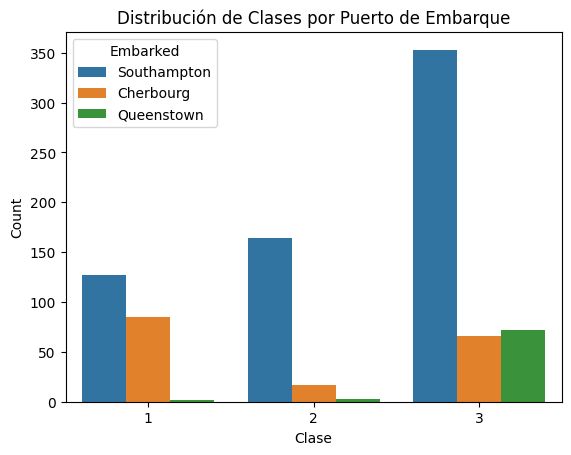

In [ ]:
sns.countplot(x='Pclass', hue='Embarked', data=titanic)
plt.title('Distribución de Clases por Puerto de Embarque')
plt.xlabel('Clase')
plt.ylabel('Count')
plt.show()

Vemos que la clase no incide directamente, ya que Cherbourg tiene más gente de primera clase que de tercera y aun así tiene menor porcentaje de supervivencia.

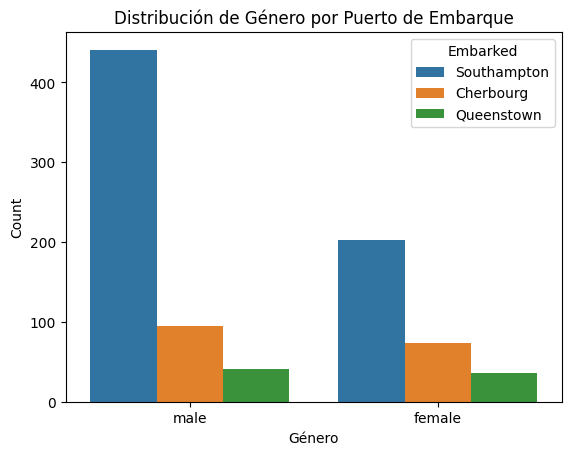

In [ ]:
sns.countplot(x='Sex', hue='Embarked', data=titanic)
plt.title('Distribución de Género por Puerto de Embarque')
plt.xlabel('Género')
plt.ylabel('Count')
plt.show()

El género tampoco lo es. Desde Cherbourg embarcan más hombres que mujeres, pero sigue la misma proporción que el resto de puertos, por lo que no se puede considerar relevante en esa caída de supervivencia.

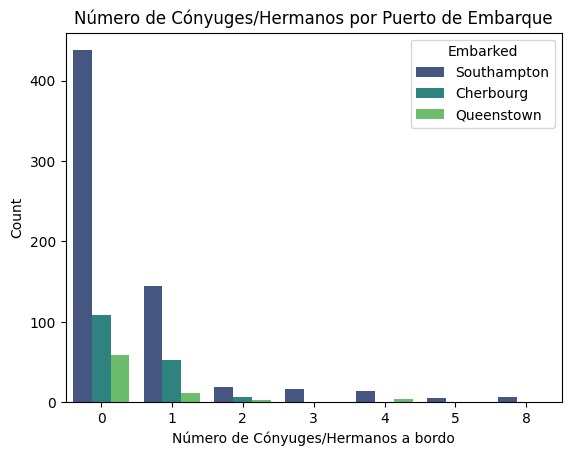

In [ ]:
sns.countplot(x='SibSp', hue='Embarked', data=titanic, palette='viridis')
plt.title('Número de Cónyuges/Hermanos por Puerto de Embarque')
plt.xlabel('Número de Cónyuges/Hermanos a bordo')
plt.ylabel('Count')
plt.show()

Vemos que Cherbourg dispone de bastante proporción de gente con 1 familiar y una cantidad proporcional de gente sin familiares al resto de puertos, por tanto no podemos afirmar con los datos que disponemos de que sea un factor incidente en la supervivencia y podría ser que la baja supervivencia se debiese a la mera casualidad.

Como conclusión basada en este pequeño estudio, **pese a que existen muchos factores que influyen en menor medida, como la edad o la clase en el barco, los factores realmente determinantes en la supervivencia de los pasajeros fueron ser mujer y/o disponer de un grupo familiar a bordo de al menos 2 personas.**


